# Regolarizzazione L1 e L2

La regolarizzazione è una tecnica utilizzata per contrastare il problema dell'overfitting, una situazione che si manifesta quando la rete memorizza le caratteristiche del set di addestramento piuttosto che apprendere da esse.
<br>
<br>
L'overfitting è caratterizzato da:

- **Alta variaza:** le previsioni per modelli addestrati con diverse parti del dataset saranno molto diverse tra loro.
- **Basso bias:** l'errore per le predizioni sul set di addestramento è mediamente molto basso.

<img src="https://github.com/ProfAI/dl00/blob/master/6%20-%20Overfitting%20e%20metodi%20di%20regolarizzazione/res/overfitting.png?raw=1" width="500px" /><br>

In questo notebook vedremo come contrastare l'overfitting della nostra rete addestrata sul Fashion MNIST utilizzando la regolarizzazione L1 e L2.
<br>
Importiamo i moduli che ci serviranno.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense

from keras.callbacks import History 

from keras import optimizers

from time import time

## Preparazione dei dati
Carichiamo il dataset Fashion MNIST utilizzando Keras e preprocessiamo i dati.

In [2]:
from keras.datasets import fashion_mnist

# Caricamento del dataset

labels = ["T-shirt/top","Pantalone","Pullover","Vestito","Cappotto","Sandalo","Maglietta","Sneaker","Borsa","Stivaletto"]

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Encoding delle immagini

X_train = X_train.reshape(X_train.shape[0],28*28)
X_test = X_test.reshape(X_test.shape[0],28*28)

# Normalizzazione

X_train = X_train/255
X_test = X_test/255

# Encoding del target

num_classes=10

y_train_dummy = to_categorical(y_train, num_classes)
y_test_dummy = to_categorical(y_test, num_classes)

4423680/4422102 [==============================] - 0s 0us/step


Adesso ogni immagine è codificata in un vettore contenente il valore dei pixel normalizzati disposti su di un'unica riga.
<br>
Il target è codificato all'interno di 10 variabili dummy, una per ogni classe, in cui la variabile alla posizione della classe di appartenenza vale 1 (True), mentre le altre valgono 0 (False).

## Riconoscere l'overfitting
Evidenziare un problema di overfitting è molto semplice, un modello che ne soffre avrà memorizzato la struttura dei dati di addestramento, piuttosto che imparare da essi, quindi l'errore per le predizioni sul train set sarà molto basso, invece fallirà nel generalizzare, perciò l'errore nel test set sarà decisamente più alto.<br><br>
Quindi per riconoscere l'overfitting è sufficente confrontare questi due valori.

In [3]:
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)
    
metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 [==============================] - 2s 4ms/step - loss: 0.8406 - accuracy: 0.7127
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4064 - accuracy: 0.8545
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3482 - accuracy: 0.8729
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.8815
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2926 - accuracy: 0.8908
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2733 - accuracy: 0.8975
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.9041
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2513 - accuracy: 0.9071
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2348 - accuracy: 0.9134
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.2294 - accura

Come vedi l'errore sul set di test è notevolmente più alto rispetto a quello sul set di addestramento, si tratta di un problema di overfitting.

## Utilizzare la regolarizzazione con Keras

Con Keras possiamo regolarizzare pesi, bias e output lineare di un determinato strato utilizzando i seguenti parametri della classe Dense:

- **kernel_regularizer**: applica la regolarizzazione ai pesi di uno strato.
- **bias_regularizer**: applica la regolarizzazione ai bias di uno strato.
- **activity_regularizer**: applica la regolarizzazione all'ouput lineare di uno strato.

## Applicare la regolarizzazione L2

La **regolarizzazione L2** è una tecnica di regolarizzazione che consiste nell'aggiungere una penalità per i pesi nella funzione di costo durante la fase di addestramento.<br>
La penalità è data dalla somma dei quadrati dei pesi:
$$\lambda\sum_{j=1}^{M}W_j^2$$<br>
**Lambda** è il **parametro di regolarizzazione** ed è un'altro iperparametro.
<br><br>
Possiamo utilizzare la regolarizzazione L2 in uno strato della nostra passando al parametro la funzione l2 con all'interno il valore del parametro di regolarizzazione.

In [4]:
from keras.regularizers import l2

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)
    
metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 6.1049 - accuracy: 0.6938
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.9865 - accuracy: 0.8253
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.8210
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6211 - accuracy: 0.8383
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5944 - accuracy: 0.8399
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5578 - accuracy: 0.8442
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5374 - accuracy: 0.8513
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.8571
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4988 - accuracy: 0.8599
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4872 - accura

## Aggiungere la regolarizzazione L1

La regolarizzazione L1 è un'altra tecnica di regolarizzazione che funziona in maniera simile alla L2, con la differenza che il termine di regolarizza sarà dato dalla somma del valore assoluto dei pesi:
$$\lambda\sum_{j=1}^{M}|W_j|$$<br>
e viene sempre applicato alla funzione di costo durante la fase di addestramento. La regolarizzazione L1 è molto più intensa della L2 e tende a ridurre a 0 molti pesi.
<br>
Nella pratica la regolarizzazione L2 porta quasi sempre a migliori risultati della L1, una buona tecnica consiste nell'utilizzarle insieme, con Keras possiamo farlo passando al parametro kernel_regularizer la funzione l1_l2 (se volessi utilizzare solo la L1, puoi anche farlo utilizzando la funzione l1).

In [5]:
# from keras.regularizers import l1 # Nel caso volessi utilizzare solo la regolarizzazione l1
from keras.regularizers import l1_l2,l2

"""
Train Accuracy = 0.8295 - Train Loss = 0.7705
Test Accuracy = 0.8204 - Test Loss = 0.8011
"""

model = Sequential()
model.add(Dense(512, activation='relu', input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu', kernel_regularizer=l1_l2(l1=0.0001,l2=0.001)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train_dummy, epochs=100, batch_size=512)

metrics_train = model.evaluate(X_train, y_train_dummy, verbose=0)
metrics_test = model.evaluate(X_test, y_test_dummy, verbose=0)

print("Train Accuracy = %.4f - Train Loss = %.4f" % (metrics_train[1], metrics_train[0]))
print("Test Accuracy = %.4f - Test Loss = %.4f" % (metrics_test[1], metrics_test[0]))

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 4.9157 - accuracy: 0.6862
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 1.0965 - accuracy: 0.8310
Epoch 3/100
118/118 [==============================] - 0s 3ms/step - loss: 0.8368 - accuracy: 0.8299
Epoch 4/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.8486
Epoch 5/100
118/118 [==============================] - 0s 3ms/step - loss: 0.6400 - accuracy: 0.8497
Epoch 6/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5954 - accuracy: 0.8505
Epoch 7/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.8551
Epoch 8/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5436 - accuracy: 0.8579
Epoch 9/100
118/118 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.8629
Epoch 10/100
118/118 [==============================] - 0s 3ms/step - loss: 0.4917 - accura

Siamo ancora dai risultati ottimali, ma applicando la regolarizzazione siamo riusciti a contrastare l'overfitting e abbiamo creato un modello in grado di apprendere dai dati di addestramento e generalizzare su dati sconosciuti.

## Mettiamo all'opera la rete neurale
Adesso che abbiamo eliminato l'overfitting dalla nostra rete (o meglio, lo abbiamo limitato), proviamo a metterla all'opera cercando di identificare capi di abbigliamento, scarpe e accessori da immagini pescate in giro per il web. Per caricare un'immagine da un url remoto possiamo utilizzare il modulo *skimage*.

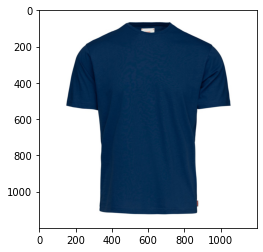

In [7]:
from skimage import io

url = "https://cdn.shopify.com/s/files/1/0012/9892/3622/products/3003103_002_1_0_390e8693-e6d4-4abe-8936-58d8dc3aa630_1200x.jpg?v=1581463570"

image = io.imread(url)
plt.imshow(image)
plt.show()

Definiamo una funzione che ci servirà per preprocessare l'immagine, cioè applicherà quelle trasformazioni necessarie per poterla dare in input alla nostra rete neurale. Nota che gli esempi del fashion MNIST sono su sfondo nero, solitamente le immagini che si trovano nel web sono su sfondo bianco, quindi all'occorrenza dobbiamo essere in grado di invertire il colore dell'immagine.

In [8]:
from skimage.transform import resize
from skimage.color import rgb2gray

def preprocess(image, invert_colors=True):
    # Ridimensioniamo l'immagine in 28x28
    image_small = resize(image, (28,28))
    # Convertiamo in bianco e nero
    image_small = rgb2gray(image_small)
    # Codifichiamo in un singolo vettore
    x = image_small.reshape(1,28*28)
    # Se serve, invertiamo i colori
    if(invert_colors):
        x = 1-x
    return x

Definiamo una seconda funzione che ci servirà per eseguire la predizione e mostrare l'immagine prima e dopo essere processata.

In [11]:
def predict_and_show(image_url,invert_colors=True):
    
    image = io.imread(image_url)
    print("Immagine originale")
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    
    x = preprocess(image,invert_colors)
    print("Immagine codificata")
    plt.imshow(x.reshape(28,28),cmap="gray")
    plt.axis("off")
    plt.show()
    
    pred = model.predict_classes(x)
    print("Oggetto identificato come: %s" % labels[pred[0]])

Ora eseguiamo qualche prova.

Immagine originale


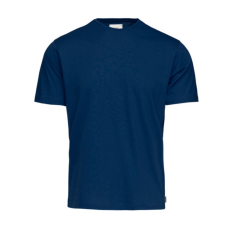

Immagine codificata


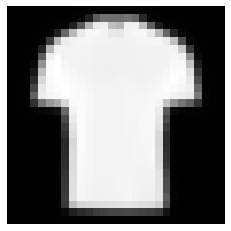

Oggetto identificato come: T-shirt/top


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [12]:
predict_and_show("https://cdn.shopify.com/s/files/1/0012/9892/3622/products/3003103_002_1_0_390e8693-e6d4-4abe-8936-58d8dc3aa630_1200x.jpg?v=1581463570")

Immagine originale


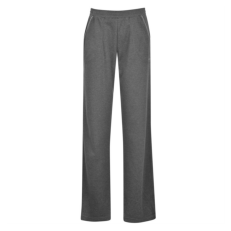

Immagine codificata


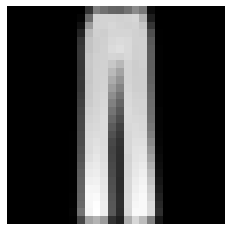

Oggetto identificato come: Pantalone


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [13]:
predict_and_show("https://s3-eu-west-1.amazonaws.com/images.linnlive.com/547b3d68c93e199cbd048cb886b17ccc/98a4abe2-155b-4fad-a4ec-21af2deb438f.jpg")

Immagine originale


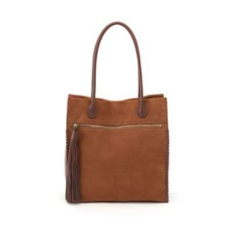

Immagine codificata


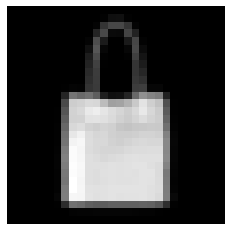

Oggetto identificato come: Borsa


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [17]:
predict_and_show("https://i.imgur.com/KAbgWa9.jpg")

Su queste immagini la nostra rete si è comportata molto bene ma trattanodosi di un'architettura molto semplice potrebbe avere difficoltà a riconoscere le immagini se lo sfondo non è perfettamente bianco.

Immagine originale


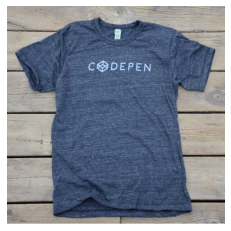

Immagine codificata


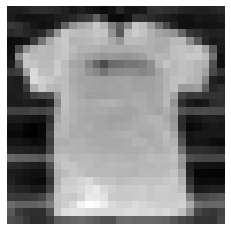

Oggetto identificato come: Borsa


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [18]:
predict_and_show("https://i.imgur.com/vZWFxfJ.jpg")